# KNN

In [2]:
import pandas as pd

# Carregar o dataset a partir do arquivo CSV
file_path = r'C:\Users\victor\OneDrive\Documentos\GitHub\InteligenciaArtificial_Projeto1\Dataset_ECG\ecg.csv'
dataset = pd.read_csv(file_path)

# Exibir as primeiras linhas do dataset para conferir se foi carregado corretamente
dataset.head()

,-0.11252183,-2.8272038,-3.7738969,-4.3497511,-4.376041,-3.4749863,-2.1814082,-1.8182865,-1.2505219,-0.47749208,...,0.79216787,0.93354122,0.79695779,0.57862066,0.2577399,0.22807718,0.12343082,0.92528624,0.19313742,1.0
0,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
1,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
2,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
3,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0
4,-1.507674,-3.574550,-4.478011,-4.408275,-3.321242,-2.105171,-1.481048,-1.301362,-0.498240,-0.286928,...,1.089068,0.983369,1.014124,0.952629,0.749326,1.007076,1.634990,1.493365,-0.783134,1.0


In [3]:
from sklearn.preprocessing import LabelEncoder 

# Separa saida e entrada do arquivo de treino
entrada = dataset.iloc[:, :-1]
saida = dataset.iloc[:, -1]


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

#
entrada_treino, entrada_teste, saida_treino, saida_teste = train_test_split(entrada, saida, test_size=0.3)

# Normalizar os dados usando StandardScaler
scaler = StandardScaler()
entrada_scaled = scaler.fit_transform(entrada_treino)  # Aplica o scaling
entrada_scaled_test = scaler.fit_transform(entrada_teste)

# Reduzir as dimensões com PCA
pca = PCA(n_components=2)
entrada_pca = pca.fit_transform(entrada_scaled)  # Aplica o PCA
entrada_pca_test = pca.fit_transform(entrada_scaled_test)

In [5]:
from sklearn.neighbors import KNeighborsClassifier

# Treina o modelo
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(entrada_pca, saida_treino)

KNeighborsClassifier()

In [6]:
# Fazer previsões
previsao = KNN.predict(entrada_pca_test)
print(previsao)

[1. 1. 1. ... 1. 0. 1.]


In [7]:
def classToArithimia(classe):
    if classe == 0:
        return '0: normal'
    elif classe == 1:
        return '1: anormal'
    else:
        return 'Classe inválida'

# Apply the function to each element in the previsao array
previsao_classes = list(map(classToArithimia, previsao))

# Print the results
print(previsao_classes)

['1: anormal', '1: anormal', '1: anormal', '1: anormal', '0: normal', '0: normal', '1: anormal', '1: anormal', '1: anormal', '0: normal', '1: anormal', '1: anormal', '1: anormal', '0: normal', '1: anormal', '1: anormal', '0: normal', '1: anormal', '1: anormal', '1: anormal', '1: anormal', '0: normal', '1: anormal', '1: anormal', '0: normal', '1: anormal', '0: normal', '1: anormal', '0: normal', '1: anormal', '1: anormal', '1: anormal', '1: anormal', '0: normal', '1: anormal', '1: anormal', '0: normal', '1: anormal', '1: anormal', '1: anormal', '1: anormal', '0: normal', '0: normal', '1: anormal', '1: anormal', '1: anormal', '1: anormal', '1: anormal', '1: anormal', '1: anormal', '1: anormal', '0: normal', '1: anormal', '1: anormal', '0: normal', '1: anormal', '1: anormal', '0: normal', '0: normal', '0: normal', '0: normal', '1: anormal', '1: anormal', '1: anormal', '0: normal', '0: normal', '0: normal', '1: anormal', '0: normal', '0: normal', '1: anormal', '1: anormal', '1: anormal', '

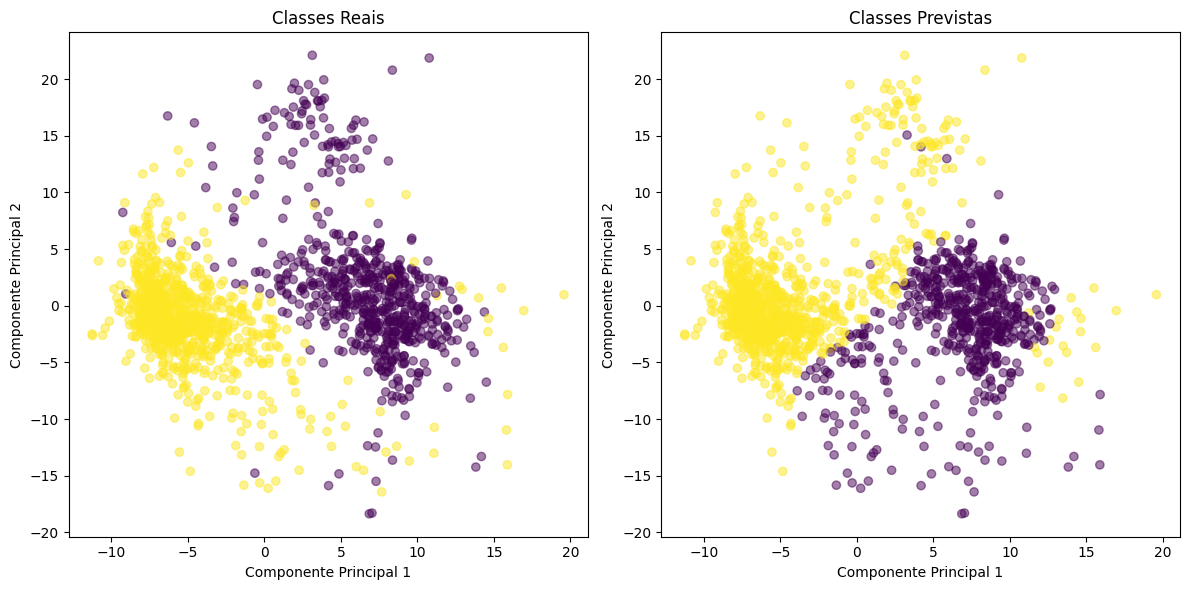

In [8]:
import matplotlib.pyplot as plt

# Plotar as classes reais
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(entrada_pca_test[:, 0], entrada_pca_test[:, 1], c=saida_teste, cmap='viridis', alpha=0.5)
plt.title('Classes Reais')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

# Plotar as classes previstas
plt.subplot(1, 2, 2)
plt.scatter(entrada_pca_test[:, 0], entrada_pca_test[:, 1], c=previsao, cmap='viridis', alpha=0.5)
plt.title('Classes Previstas')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

plt.tight_layout()
plt.show()

In [9]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calcular as métricas
accuracy = accuracy_score(saida_teste, previsao)
precision = precision_score(saida_teste, previsao)
recall = recall_score(saida_teste, previsao)
f1 = f1_score(saida_teste, previsao)
conf_matrix = confusion_matrix(saida_teste, previsao)

# Exibir os resultados
print(f'Acurácia: {accuracy}')
print(f'Precisão: {precision}')
print(f'Revocação: {recall}')
print(f'F1-Score: {f1}')
print(f'Matriz de Confusão:\n{conf_matrix}')

Acurácia: 0.8326666666666667
Precisão: 0.8327868852459016
Revocação: 0.8860465116279069
F1-Score: 0.8585915492957746
Matriz de Confusão:
[[487 153]
 [ 98 762]]


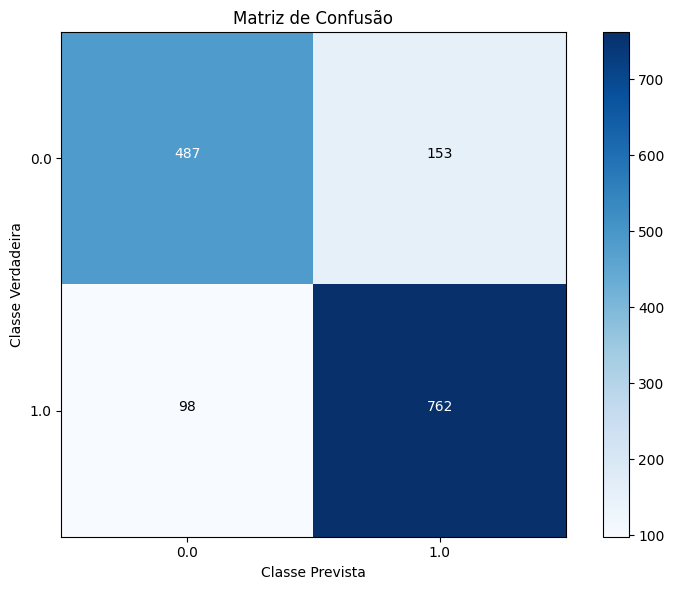

In [10]:
# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.colorbar()
tick_marks = np.arange(len(np.unique(saida_teste)))
plt.xticks(tick_marks, np.unique(saida_teste))
plt.yticks(tick_marks, np.unique(saida_teste))

# Adicionar rótulos, título e legenda
plt.ylabel('Classe Verdadeira')
plt.xlabel('Classe Prevista')

# Adicionar os valores na matriz de confusão
thresh = conf_matrix.max() / 2.
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
            horizontalalignment="center",
            color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

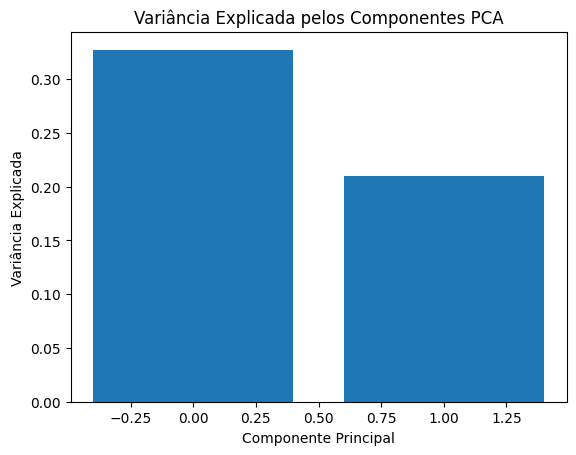

In [11]:
# Plotar a variância explicada pelos componentes principais
explained_variance = pca.explained_variance_ratio_
plt.bar(range(len(explained_variance)), explained_variance)
plt.title("Variância Explicada pelos Componentes PCA")
plt.xlabel("Componente Principal")
plt.ylabel("Variância Explicada")
plt.show()